In [3]:
%run ./HC_model.ipynb

In [18]:
## Simulation setup
simtime = 100  # ms

## Synapses setup
b = 2.5
pr = 0

# Tactile stimuli setup
it_0 = 3.25  # We increase it to compensate for the lack of multisensory input.
sigmat_i = 0.3

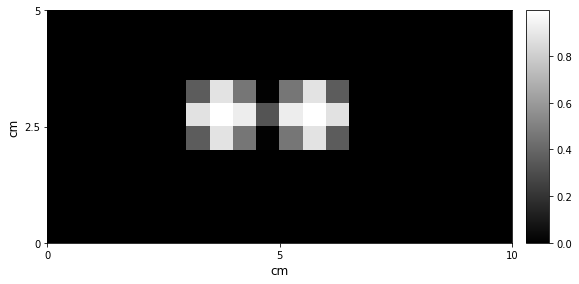

In [19]:
pr = 0
p1 = 4
p2 = 6
hcZTs = tactile_discrimination_experiment(simtime, p1, p2, b, pr, 0.15, 0.05, 1, 4)

fig, axs = plt.subplots(1, 1, figsize=(9, 9))
ax1 = plt.subplot(111)
im = ax1.imshow(hcZTs.transpose(), cmap="gray")
ax1.set_ylabel("cm", size=12)
ax1.set_xlabel("cm", size=12)
ax1.set_xticks(np.arange(-0.5, 21, 10))
ax1.set_yticks(np.arange(-0.5, 11, 5))
ax1.set_xticklabels([0, 5, 10])
ax1.set_yticklabels([0, 2.5, 5][::-1])
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
fig.colorbar(im, cax=cax)

np.save("hc_discrimination.npy", hcZTs)

**SCZ**

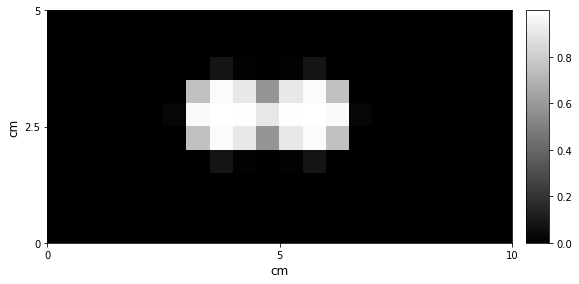

In [20]:
p1 = 4
p2 = 6
pr = 1.99620687
sczZTs = tactile_discrimination_experiment(
    simtime, p1, p2, b, 1.99620687, 0.99460344, 0.05, 1, 4
)

fig, axs = plt.subplots(1, 1, figsize=(9, 9))
ax1 = plt.subplot(111)
im = ax1.imshow(sczZTs.transpose(), cmap="gray")
ax1.set_ylabel("cm", size=12)
ax1.set_xlabel("cm", size=12)
ax1.set_xticks(np.arange(-0.5, 21, 10))
ax1.set_yticks(np.arange(-0.5, 11, 5))
ax1.set_xticklabels([0, 5, 10])
ax1.set_yticklabels([0, 2.5, 5][::-1])
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
fig.colorbar(im, cax=cax)

np.save("scz_discrimination.npy", sczZTs)

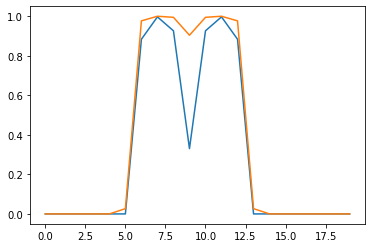

In [21]:
plt.plot(hcZTs[:, 4])
plt.plot(sczZTs[:, 4])